# AI Hiring Bias Analysis (EDA)


## Examine of Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [ ]:
df = pd.read_csv("../fair_recrutment_dataset final.csv")
df

,Candidate_ID,Gender,Age,Education_Level,Experience_Years,Skill_Score,Aptitude_Test_Score,Technical_Test_Score,Communication_Score,Certifications_Count,Previous_Companies,Interview_Score,Location,Job_Role_Applied,Expected_Salary,Hiring_Decision
0,1,Male,50,Bachelors,19,48,75,70,65,2.0,5,92,Urban,HR Executive,22214,1
1,2,Other,36,Bachelors,18,9,53,46,25,2.0,4,77,Semi-Urban,Data Analyst,130094,0
2,3,Female,58,Masters,11,1,85,62,72,1.0,3,90,Urban,ML Engineer,78652,0
3,4,Male,48,Masters,0,74,35,79,67,6.0,3,9,Urban,HR Executive,144618,0
4,5,Male,37,Bachelors,0,64,99,25,38,7.0,5,24,Urban,Data Analyst,133865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121195,47344,Male,37,Bachelors,17,71,55,56,80,8.0,2,70,Urban,Data Analyst,44867,1
121196,111198,Male,49,Masters,14,84,60,99,9,9.0,1,64,Urban,Software Engineer,103035,1
121197,52991,Female,37,Diploma,12,49,59,64,26,8.0,5,89,Urban,Manager,99111,1
121198,101228,Male,41,Bachelors,18,29,15,78,29,3.0,7,22,Semi-Urban,ML Engineer,51287,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121200 entries, 0 to 121199
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Candidate_ID          121200 non-null  int64  
 1   Gender                121190 non-null  object 
 2   Age                   121200 non-null  int64  
 3   Education_Level       121190 non-null  object 
 4   Experience_Years      121200 non-null  int64  
 5   Skill_Score           121200 non-null  int64  
 6   Aptitude_Test_Score   121200 non-null  int64  
 7   Technical_Test_Score  121200 non-null  int64  
 8   Communication_Score   121200 non-null  int64  
 9   Certifications_Count  121190 non-null  float64
 10  Previous_Companies    121200 non-null  int64  
 11  Interview_Score       121200 non-null  int64  
 12  Location              121200 non-null  object 
 13  Job_Role_Applied      121200 non-null  object 
 14  Expected_Salary       121200 non-null  int64  
 15  

In [ ]:
df.describe().round(1)

,Candidate_ID,Age,Experience_Years,Skill_Score,Aptitude_Test_Score,Technical_Test_Score,Communication_Score,Certifications_Count,Previous_Companies,Interview_Score,Expected_Salary,Hiring_Decision
count,121200.0,121200.0,121200.0,121200.0,121200.0,121200.0,121200.0,121190.0,121200.0,121200.0,121200.0,121200.0
mean,59996.4,40.1,9.5,49.6,49.4,49.5,49.5,4.5,3.5,49.4,84880.9,0.3
std,34639.8,11.3,5.8,28.9,28.9,28.9,28.9,2.9,2.3,28.9,37503.6,0.4
min,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,0.0
25%,30009.8,30.0,4.0,25.0,24.0,24.0,24.0,2.0,2.0,24.0,52403.0,0.0
50%,59989.5,40.0,10.0,50.0,49.0,49.0,50.0,4.0,4.0,49.0,84840.5,0.0
75%,89991.2,50.0,15.0,75.0,74.0,75.0,75.0,7.0,6.0,74.0,117374.2,1.0
max,120000.0,59.0,19.0,99.0,99.0,99.0,99.0,9.0,7.0,99.0,149998.0,1.0


In [ ]:
# remove the rows with missing values
df = df.dropna()

# drop duplicate rows
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119971 entries, 0 to 119999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Candidate_ID          119971 non-null  int64  
 1   Gender                119971 non-null  object 
 2   Age                   119971 non-null  int64  
 3   Education_Level       119971 non-null  object 
 4   Experience_Years      119971 non-null  int64  
 5   Skill_Score           119971 non-null  int64  
 6   Aptitude_Test_Score   119971 non-null  int64  
 7   Technical_Test_Score  119971 non-null  int64  
 8   Communication_Score   119971 non-null  int64  
 9   Certifications_Count  119971 non-null  float64
 10  Previous_Companies    119971 non-null  int64  
 11  Interview_Score       119971 non-null  int64  
 12  Location              119971 non-null  object 
 13  Job_Role_Applied      119971 non-null  object 
 14  Expected_Salary       119971 non-null  int64  
 15  Hirin

## EDA


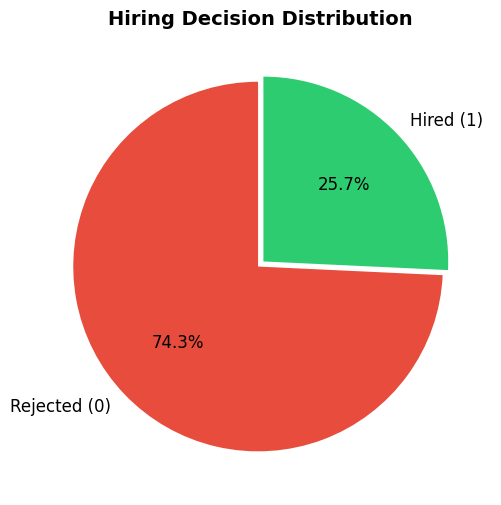

Total Candidates: 119,971
Hired: 30,885 (25.7%)
Rejected: 89,086 (74.3%)


In [ ]:
# 1. Hiring Decision Distribution
hiring_counts = df["Hiring_Decision"].value_counts()
colors = ["#e74c3c", "#2ecc71"]
labels = ["Rejected (0)", "Hired (1)"]

plt.figure(figsize=(6, 6))
plt.pie([hiring_counts[0], hiring_counts[1]], labels=labels, colors=colors, 
        autopct="%1.1f%%", startangle=90, explode=(0.02, 0.02),
        textprops={"fontsize": 12})
plt.title("Hiring Decision Distribution", fontsize=14, fontweight="bold")
plt.show()

print(f"Total Candidates: {len(df):,}")
print(f"Hired: {hiring_counts[1]:,} ({hiring_counts[1]/len(df)*100:.1f}%)")
print(f"Rejected: {hiring_counts[0]:,} ({hiring_counts[0]/len(df)*100:.1f}%)")


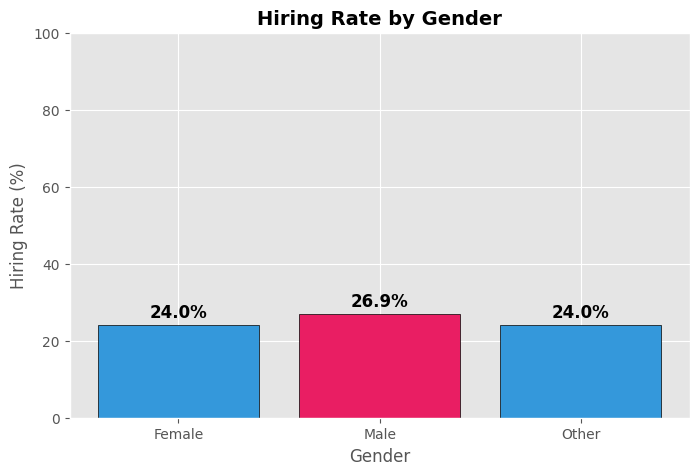

In [ ]:
# 2. Gender vs Hiring Decision (Bias Check)
gender_hiring = df.groupby("Gender")["Hiring_Decision"].agg(["sum", "count"])
gender_hiring["Hiring_Rate"] = (gender_hiring["sum"] / gender_hiring["count"] * 100).round(1)
gender_hiring = gender_hiring.reset_index()

colors = ["#3498db", "#e91e63"]

plt.figure(figsize=(8, 5))
bars = plt.bar(gender_hiring["Gender"], gender_hiring["Hiring_Rate"], color=colors, edgecolor="black")
plt.title("Hiring Rate by Gender", fontsize=14, fontweight="bold")
plt.ylabel("Hiring Rate (%)")
plt.xlabel("Gender")
plt.ylim(0, 100)

for bar, rate in zip(bars, gender_hiring["Hiring_Rate"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f"{rate}%", ha="center", fontweight="bold", fontsize=12)

plt.show()


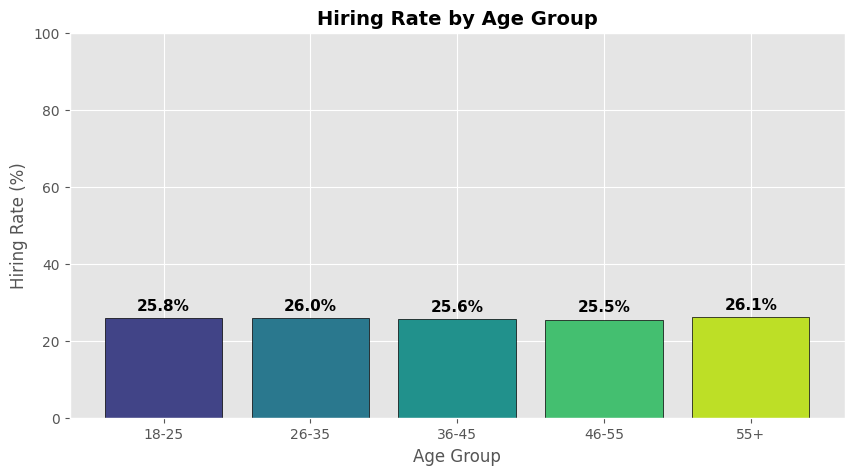

In [ ]:
# 3. Age Group vs Hiring Decision (Bias Check)
# Create age groups
bins = [0, 25, 35, 45, 55, 100]
labels = ["18-25", "26-35", "36-45", "46-55", "55+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

age_hiring = df.groupby("Age_Group", observed=True)["Hiring_Decision"].agg(["sum", "count"])
age_hiring["Hiring_Rate"] = (age_hiring["sum"] / age_hiring["count"] * 100).round(1)
age_hiring = age_hiring.reset_index()

plt.figure(figsize=(10, 5))
colors = plt.cm.viridis([0.2, 0.4, 0.5, 0.7, 0.9])
bars = plt.bar(age_hiring["Age_Group"], age_hiring["Hiring_Rate"], color=colors, edgecolor="black")
plt.title("Hiring Rate by Age Group", fontsize=14, fontweight="bold")
plt.ylabel("Hiring Rate (%)")
plt.xlabel("Age Group")
plt.ylim(0, 100)

for bar, rate in zip(bars, age_hiring["Hiring_Rate"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f"{rate}%", ha="center", fontweight="bold", fontsize=11)

plt.show()


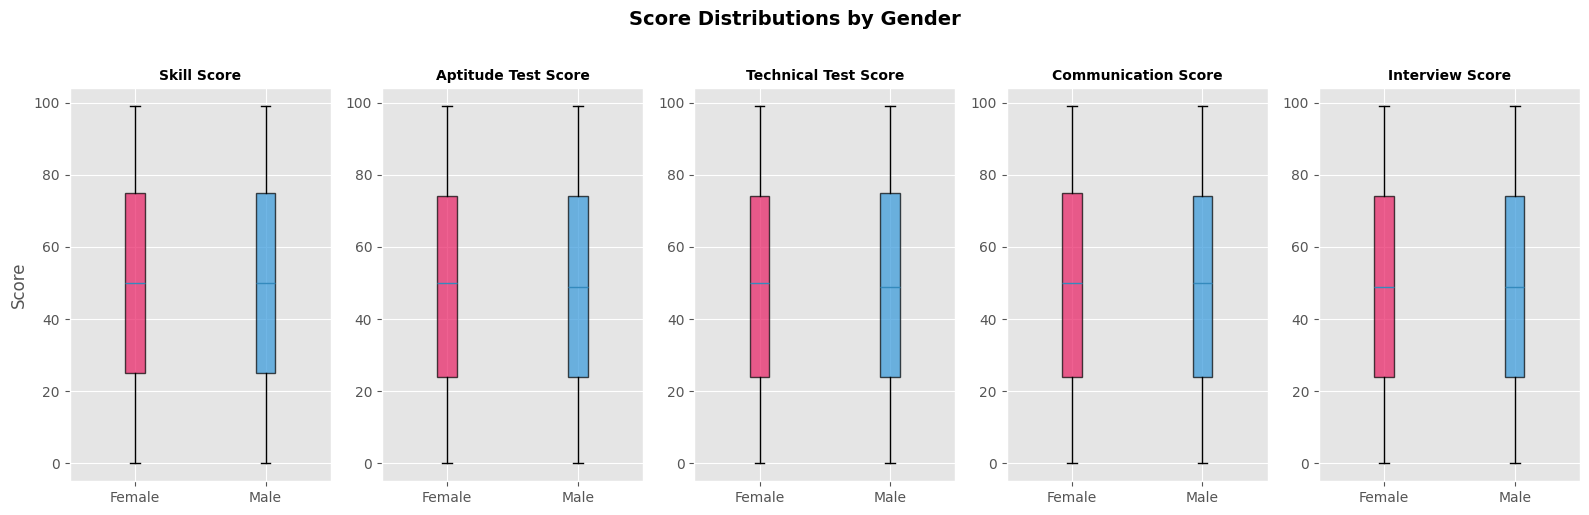

In [ ]:
# 4. Score Distributions by Gender (Box Plots)
score_columns = ["Skill_Score", "Aptitude_Test_Score", "Technical_Test_Score", 
                 "Communication_Score", "Interview_Score"]

fig, axes = plt.subplots(1, 5, figsize=(16, 5))
colors = {"Female": "#e91e63", "Male": "#3498db"}

for idx, col in enumerate(score_columns):
    data = [df[df["Gender"] == "Female"][col], df[df["Gender"] == "Male"][col]]
    bp = axes[idx].boxplot(data, labels=["Female", "Male"], patch_artist=True)
    
    for patch, color in zip(bp["boxes"], ["#e91e63", "#3498db"]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(col.replace("_", " "), fontsize=10, fontweight="bold")
    axes[idx].set_ylabel("Score" if idx == 0 else "")

plt.suptitle("Score Distributions by Gender", fontsize=14, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


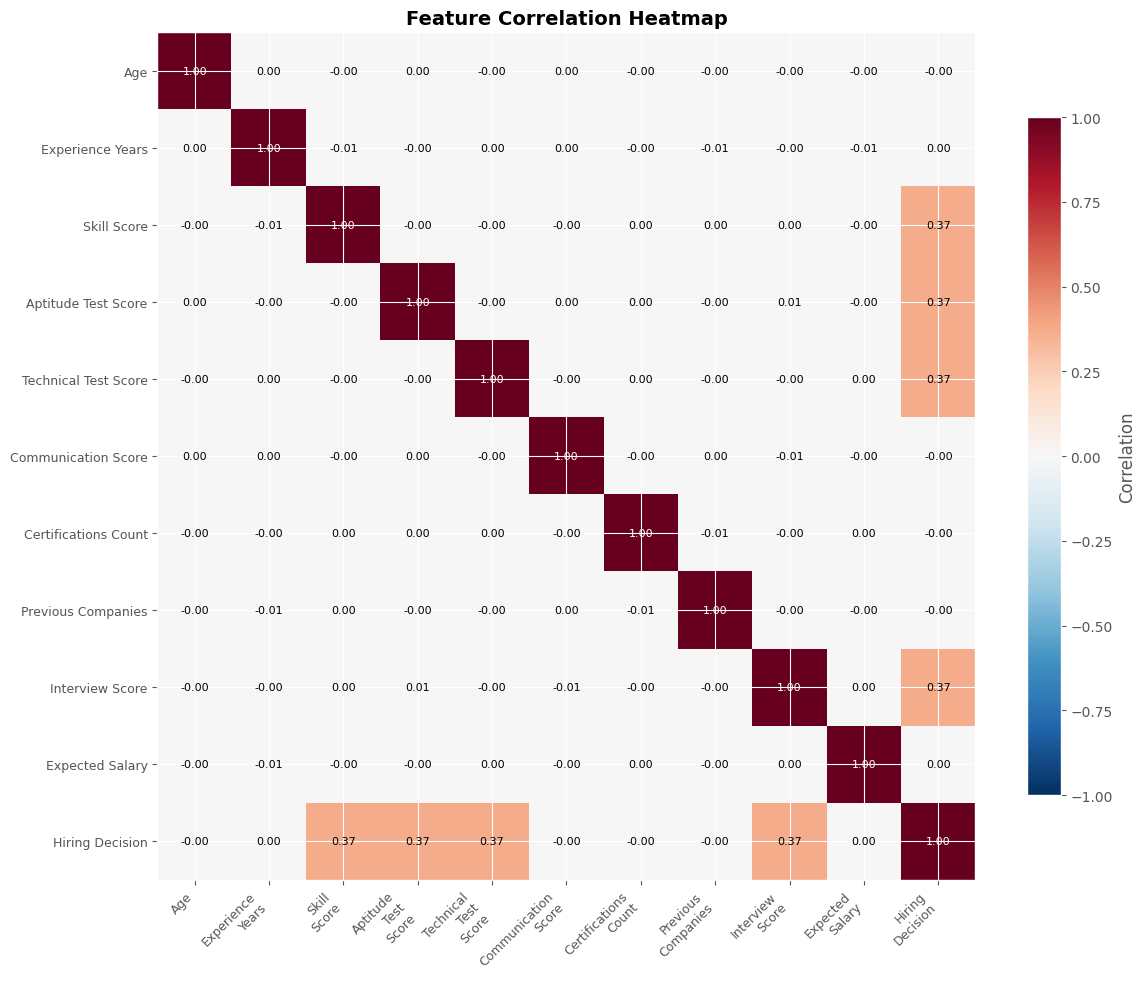

In [ ]:
# 5. Correlation Heatmap
numerical_cols = ["Age", "Experience_Years", "Skill_Score", "Aptitude_Test_Score", 
                  "Technical_Test_Score", "Communication_Score", "Certifications_Count",
                  "Previous_Companies", "Interview_Score", "Expected_Salary", "Hiring_Decision"]

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
cmap = plt.cm.RdBu_r

im = plt.imshow(corr_matrix, cmap=cmap, aspect="auto", vmin=-1, vmax=1)
plt.colorbar(im, label="Correlation", shrink=0.8)

plt.xticks(range(len(numerical_cols)), [col.replace("_", "\n") for col in numerical_cols], 
           rotation=45, ha="right", fontsize=9)
plt.yticks(range(len(numerical_cols)), [col.replace("_", " ") for col in numerical_cols], fontsize=9)

# Add correlation values
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        val = corr_matrix.iloc[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        plt.text(j, i, f"{val:.2f}", ha="center", va="center", color=color, fontsize=8)

plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


**Observation**

- Recruiting rates are very similar across gender and age groups, indicating a roughly balanced demographic structure at the record company level
- The highly symmetrical distribution of features across groups, which proves that the datasets are synthetic
- Recruiting decisions show a moderate correlation with skills, qualifications, technical skills, and interview scores, implying that target labels are primarily determined by these performance metrics
- Sensitive attributes such as gender and age show near-zero correlation with recruitment outcomes, indicating minimal pre-existing bias in the original data


In [ ]:
# save the cleaned dataset for future use
df.to_csv("cleaned_fair_recrutment_dataset.csv", index=False)